In [3]:
import numpy as np
import sklearn
import pandas as pd

In [19]:
df = pd.read_csv("winequality-red.csv")

In [20]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
linear = LinearRegression()

In [26]:
A = np.array(df["pH"]).reshape(-1,1)
B = np.array(df["citric acid"])

In [27]:
model = linear.fit(A,B)

In [28]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Scatterplot of citric acid against pH')

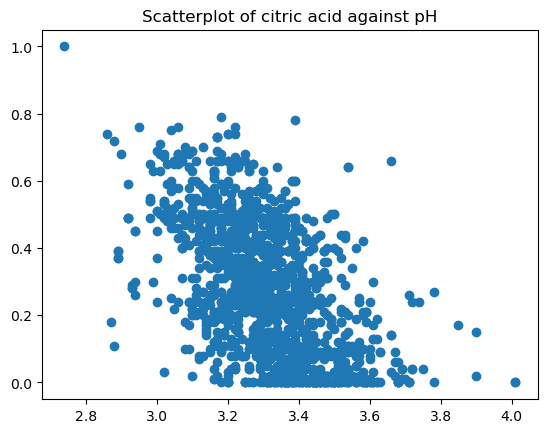

In [32]:
plt.scatter(A,B)
plt.title("Scatterplot of citric acid against pH")

In [34]:
from sklearn.metrics import mean_squared_error

In [36]:
predictions = linear.predict(A)

In [38]:
error = mean_squared_error(B,predictions)

In [39]:
print(error)

0.026787058498112033


In [40]:
#error of 2.7% is pretty low

In [60]:
from sklearn.linear_model import Ridge,Lasso

In [75]:
l1 = Ridge(alpha = 0.01,solver = "cholesky")

In [76]:
l1.fit(A,B)

Ridge(alpha=0.01, solver='cholesky')

In [77]:
C = l1.predict(A)

In [78]:
error0 = mean_squared_error(B,C)

In [79]:
print(error0)

0.026787059265363584


In [81]:
l2 = Lasso(alpha=0.05)

In [82]:
l2.fit(A,B)

Lasso(alpha=0.05)

In [83]:
D = l2.predict(A)

In [85]:
error1 = mean_squared_error(B,D)
print(error1)

0.03792375112494089


In [86]:
from sklearn.linear_model import SGDRegressor

In [91]:
sgd = SGDRegressor(max_iter =1000, random_state = 42)

In [95]:
C2 = sgd.fit(A,B)

In [59]:
chlorides = np.array(df["chlorides"]).reshape(-1,1)
density = np.array(df.columns[7])